In [1]:
import nltk
import random
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
from nltk.corpus import reuters, stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import files
import zipfile
import os

# Upload the zip file containing the data directory
uploaded = files.upload()

# Extract the uploaded zip file
for fn in uploaded.keys():
    zip_file_path = fn
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/data')  # Extract to a specific directory
    print(f'Uploaded zip file "{fn}" extracted.')


Saving ReutersC50.zip to ReutersC50 (1).zip
Uploaded zip file "ReutersC50 (1).zip" extracted.


In [3]:
# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("/content/data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("/content/data/ReutersC50/C50test")

In [1]:
# If using local directory , use the below patch

# Reading the training and test data
# train_texts, train_labels = read_data_from_directory("C:\\Users\\hp\\Desktop\\SANYAM\\UT AUSTIN\\Summer\\Intro_to_ML\\Assignment\\ReutersC50\\C50train")
# test_texts, test_labels = read_data_from_directory("C:\\Users\\hp\\Desktop\\SANYAM\\UT AUSTIN\\Summer\\Intro_to_ML\\Assignment\\ReutersC50\\C50test")

In [4]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

In [6]:
# Helper function to tokenize, remove punctuation, and stem
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())

    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    print(tokens)
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    return stemmed_tokens

In [9]:
import nltk
nltk.download('punkt')
preprocess_text(train_texts[2]);

['world', 'potash', 'market', 'churning', 'canada', "'s", 'huge', 'potash', 'corp', 'saskatchewan', 'inc', 'middle', 'upheaval', 'since', 'potash', 'corp', 'world', "'s", 'biggest', 'potash', 'producer', 'said', 'last', 'week', 'entered', 'talks', 'buy', 'controlling', 'stake', 'major', 'european', 'potash', 'firm', 'stock', 'zigzagged', 'market', 'comes', 'terms', 'quickly', 'changing', 'picture', 'potash', 'world', '``', "'re", 'getting', 'interesting', 'part', 'fertilizer', 'world', "n't", 'know', 'happen', "''", 'said', 'james', 'searls', 'potash', 'analyst', 'u.s.', 'geological', 'survey', 'virginia', '``', "'s", 'going', 'really', 'curious', "''", 'potash', 'corp', 'wants', 'acquire', '51', 'percent', 'interest', 'kali', 'und', 'salz', 'ag', 'german', 'chemical', 'conglomerate', 'basf', 'ag', 'succeeds', 'potash', 'corp', 'would', 'control', '25', 'percent', 'germany', "'s", 'four-million-tonne-per-year', 'potash', 'market', 'deal', 'would', 'boost', 'saskatchewan', 'company', "'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


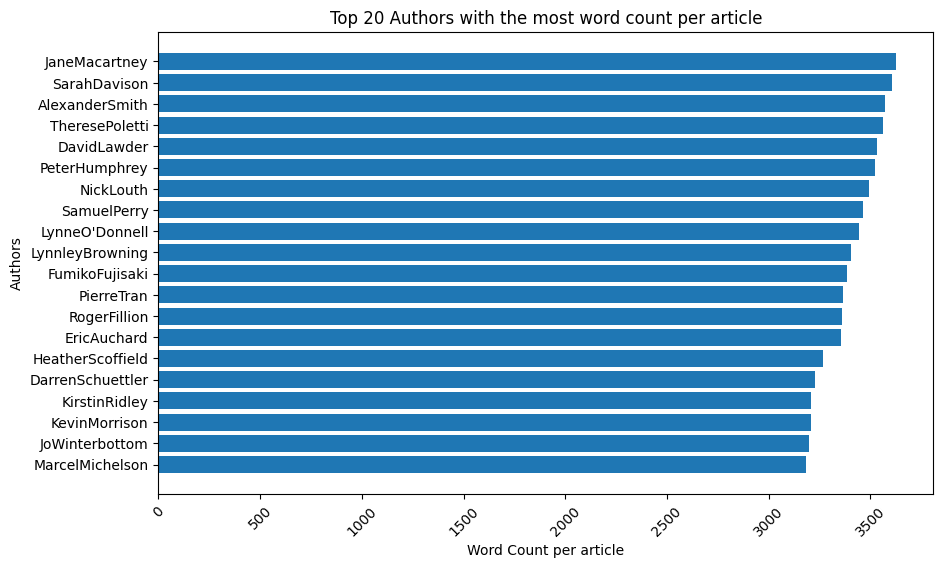

In [14]:
#EDA : Plotting for authors with highest word count

dict1 = {}
for i in set(train_labels):
    dict1[i] = 0

for i in range(0,len(train_labels)):
    dict1[train_labels[i]] += len(train_texts[i])/50

sorted_dict1 = dict(sorted(dict1.items(), key=lambda item: item[1] , reverse = True))

# Extract keys and values from the dictionary
import matplotlib.pyplot as plt
keys = list(sorted_dict1.keys())
values = list(sorted_dict1.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(keys[:20], values[:20])
plt.ylabel("Authors")
plt.xlabel("Word Count per article")
plt.title("Top 20 Authors with the most word count per article")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [18]:
# Basic Statistics
print(f"Total number of training documents: {len(train_texts)}")
print(f"Total number of test documents: {len(test_texts)}")


Total number of training documents: 2500
Total number of test documents: 2500


In [19]:
%%capture

train_doc_lengths = [len(preprocess_text(text)) for text in train_texts];
test_doc_lengths = [len(preprocess_text(text)) for text in test_texts];


In [20]:

print(f"\nAverage document length in training set: {np.mean(train_doc_lengths)} words")
print(f"Minimum document length in training set: {np.min(train_doc_lengths)} words")
print(f"Maximum document length in training set: {np.max(train_doc_lengths)} words")
print(f"\nAverage document length in test set: {np.mean(test_doc_lengths)} words")
print(f"Minimum document length in test set: {np.min(test_doc_lengths)} words")
print(f"Maximum document length in test set: {np.max(test_doc_lengths)} words")


Average document length in training set: 328.4308 words
Minimum document length in training set: 33 words
Maximum document length in training set: 957 words

Average document length in test set: 333.2564 words
Minimum document length in test set: 42 words
Maximum document length in test set: 934 words


In [23]:
%%capture
# Term Frequencies
all_tokens = [token for text in train_texts for token in preprocess_text(text)];
common_tokens = Counter(all_tokens).most_common(10);



Most common words across the training set:
said: 19856
's: 14872
'': 13882
``: 13712
year: 6146
compani: 5651
would: 5237
percent: 5211
million: 4942
market: 4629


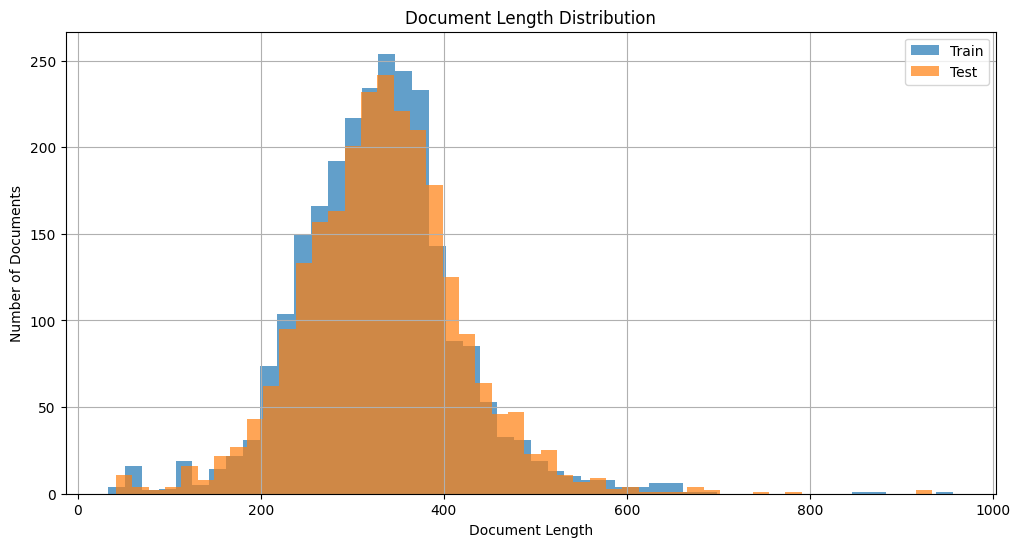

In [24]:
print("\nMost common words across the training set:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(train_doc_lengths, bins=50, alpha=0.7, label='Train')
plt.hist(test_doc_lengths, bins=50, alpha=0.7, label='Test')
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
%%capture
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
train_dtm = vectorizer.fit_transform(train_texts)
test_dtm = vectorizer.transform(test_texts)

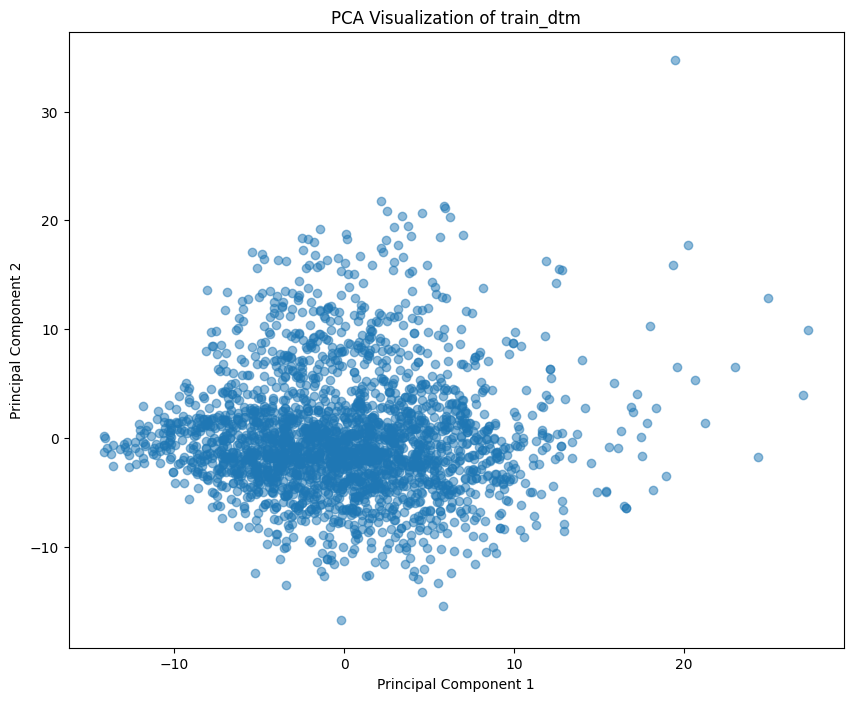

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
train_dtm_pca = pca.fit_transform(train_dtm.toarray())

# Create a scatter plot of the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(train_dtm_pca[:, 0], train_dtm_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of train_dtm')
plt.show()


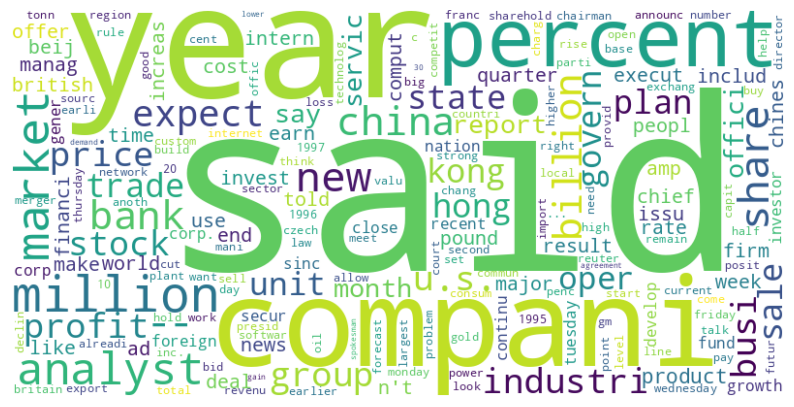

In [31]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aggregate term frequencies across all documents
term_frequencies = np.sum(train_dtm.toarray(), axis=0)

# Create a dictionary of word frequencies
word_freq_dict = {word: freq for word, freq in zip(vectorizer.get_feature_names_out(), term_frequencies)}
sorted_dict = dict(sorted(word_freq_dict.items(), key=lambda item: item[1] , reverse = True))

keys_to_remove = ["'s", "''", "``"]  # List of keys to remove

# Create a new dictionary excluding the specified keys
filtered_dict = {key: value for key, value in sorted_dict.items() if key not in keys_to_remove}

# Aggregate term frequencies across all documents
term_frequencies = np.sum(train_dtm.toarray(), axis=0)

# Create a dictionary of word frequencies
word_freq_dict = {word: freq for word, freq in zip(vectorizer.get_feature_names_out(), term_frequencies)}

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_dict)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

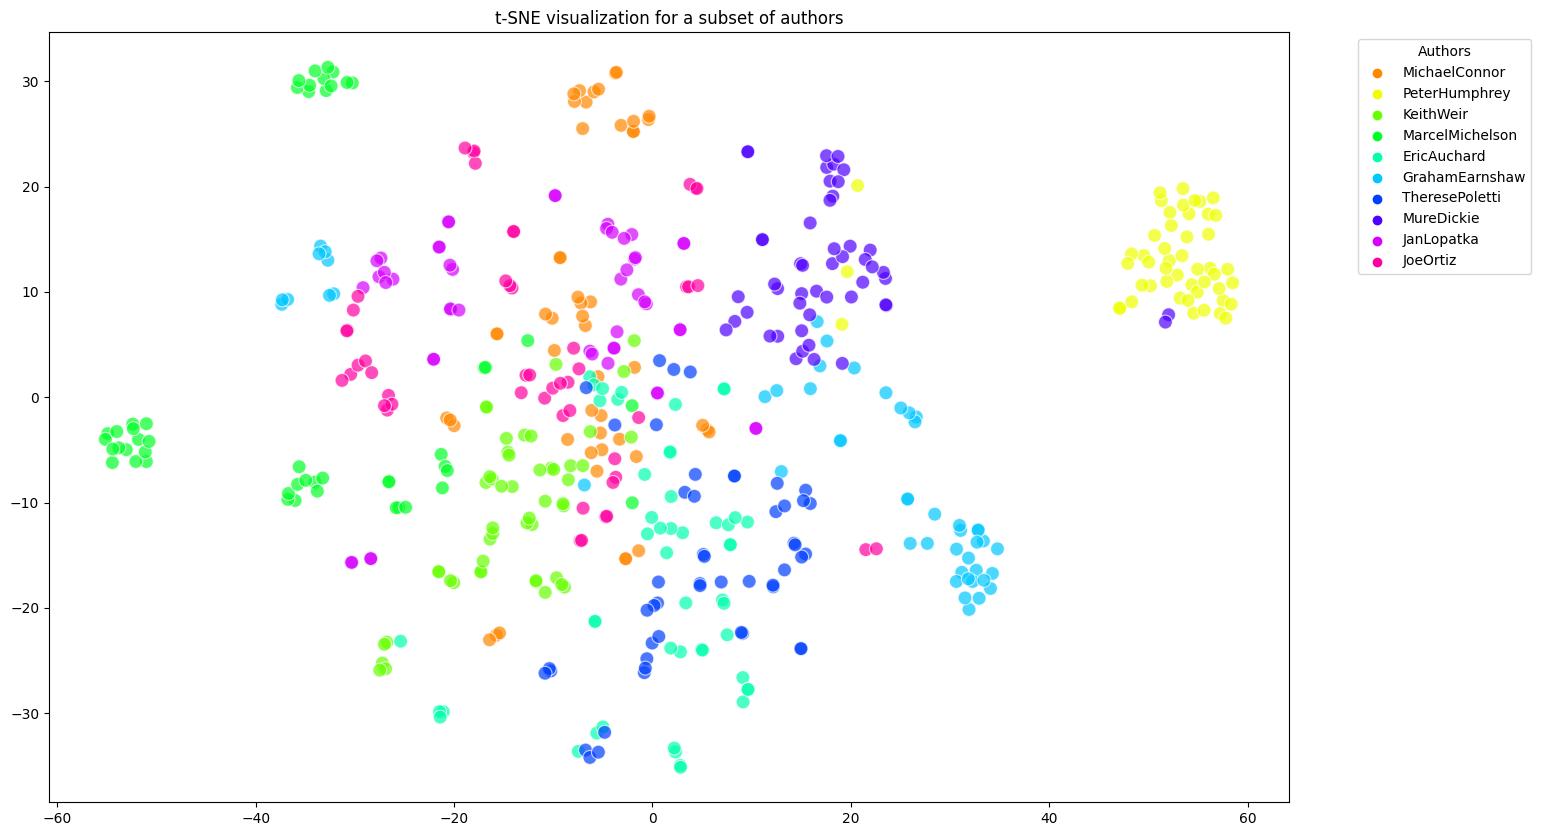

In [32]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random

# 1. Choose a subset of 10 authors
unique_authors = list(set(train_labels))
selected_authors = random.sample(unique_authors, 10)

# 2. Filter the training data
filtered_indices = [i for i, label in enumerate(train_labels) if label in selected_authors]
filtered_texts = [train_texts[i] for i in filtered_indices]
filtered_labels = [train_labels[i] for i in filtered_indices]
filtered_dtm = train_dtm[filtered_indices]

# 3. PCA and t-SNE
pca = PCA(n_components=100)
reduced_data_pca = pca.fit_transform(filtered_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# 4. Plotting
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=filtered_labels,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Let us create a TF_IDF matrix for the 2500 documents with 2500 max-features

In [34]:
%%capture
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer_train = TfidfVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=2500)
tfidf_train = vectorizer_train.fit_transform(train_texts)
tfidf_test = vectorizer_train.transform(test_texts)

# Convert sparse TF-IDF matrices to dense DataFrames
train_dense_matrix = tfidf_train.toarray()
train_set = pd.DataFrame(train_dense_matrix, columns=vectorizer_train.get_feature_names_out())

test_dense_matrix = tfidf_test.toarray()
test_set = pd.DataFrame(test_dense_matrix, columns=vectorizer_train.get_feature_names_out())

Conducting cross-validation for our Random Forest model involves a process where we aim to **determine the author of a document**. We achieve this by using the TF-IDF matrix as our feature set. For this, we establish a range of hyperparameters and execute **cross-validation** using **5 folds** on the training set. The outcome we obtain is the accuracy achieved through cross-validation, which helps us identify the optimal combination of hyperparameters.

In [35]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, KFold

custom_kfold = KFold(n_splits=5, shuffle=True)

RF_results_df=pd.DataFrame(columns=["tree_depth","n_trees","max_vars","accuracy"])

#Paramter tuning using k-fold cross validation
for depth in [5,10,15]:
    for n_trees in [250,500,1000]:
        for n_feat in ["sqrt",100]:
            # RF Classifier Object
            rf_model = RandomForestClassifier(n_estimators=n_trees, criterion='entropy', max_depth=depth,max_features=n_feat)

            # Cross Validation step
            cv_scores_rf = cross_val_score(rf_model, train_set, train_labels, cv=custom_kfold)

            # Printing Accuracy Score
            print('Random Forest - Depth = {} Trees = {} Mtry = {} Accuracy = {}'.format(depth, n_trees,n_feat, round(cv_scores_rf.mean(),3)))

            # Writing to Dataframe
            row_append = pd.DataFrame([[depth,n_trees,n_feat,cv_scores_rf.mean()]], columns=RF_results_df.columns)
            RF_results_df = pd.concat([RF_results_df,row_append ], ignore_index=True)

RF_results_df.to_csv("Best_Parameters_RF.csv" , head = True)

Random Forest - Depth = 5 Trees = 250 Mtry = sqrt Accuracy = 0.638
Random Forest - Depth = 5 Trees = 250 Mtry = 100 Accuracy = 0.625
Random Forest - Depth = 5 Trees = 500 Mtry = sqrt Accuracy = 0.654
Random Forest - Depth = 5 Trees = 500 Mtry = 100 Accuracy = 0.631
Random Forest - Depth = 5 Trees = 1000 Mtry = sqrt Accuracy = 0.66
Random Forest - Depth = 5 Trees = 1000 Mtry = 100 Accuracy = 0.65
Random Forest - Depth = 10 Trees = 250 Mtry = sqrt Accuracy = 0.756
Random Forest - Depth = 10 Trees = 250 Mtry = 100 Accuracy = 0.758
Random Forest - Depth = 10 Trees = 500 Mtry = sqrt Accuracy = 0.764
Random Forest - Depth = 10 Trees = 500 Mtry = 100 Accuracy = 0.767
Random Forest - Depth = 10 Trees = 1000 Mtry = sqrt Accuracy = 0.781
Random Forest - Depth = 10 Trees = 1000 Mtry = 100 Accuracy = 0.753
Random Forest - Depth = 15 Trees = 250 Mtry = sqrt Accuracy = 0.781
Random Forest - Depth = 15 Trees = 250 Mtry = 100 Accuracy = 0.766
Random Forest - Depth = 15 Trees = 500 Mtry = sqrt Accuracy

We can see that the best parameters are :
Random Forest - Depth = 15 Trees = 1000 Mtry = sqrt Accuracy = 0.794

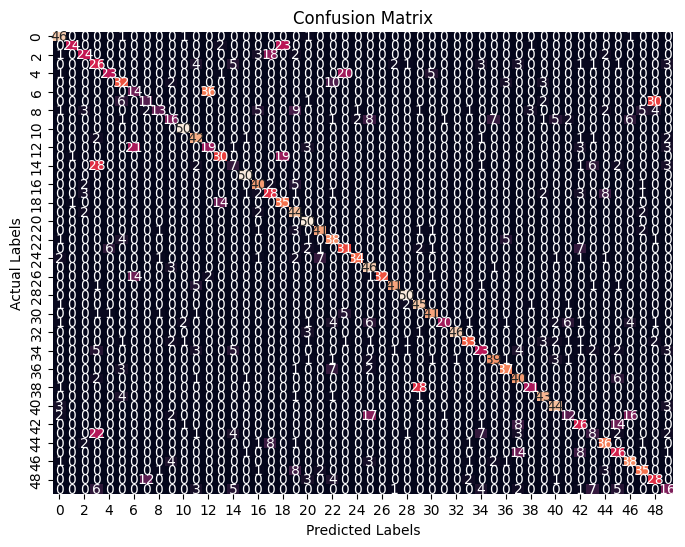

Baseline Accuracy: 0.02
Test Accuracy: 0.6376


In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=15,max_features="sqrt")
rf_model.fit(train_set,train_labels)
y_pred=model_rf.predict(test_set)

c_mat = confusion_matrix(test_labels, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(c_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the accuracy
accuracy = accuracy_score(test_labels, y_pred)
test_labels_series=pd.Series(test_labels)
baseline_accuracy=len(test_labels_series[test_labels_series==test_labels_series.value_counts().idxmax()])/len(test_labels_series)
print("Baseline Accuracy:",round(baseline_accuracy,2))
print("Test Accuracy:", accuracy)

incorrect_predictions_sum = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
worst_labels_indices = incorrect_predictions_sum.argsort()[-5:][::-1]
worst_labels = [pd.Series(test_labels).unique()[i] for i in worst_labels_indices]

Test Accuracy is much better than baseline accuracy !!

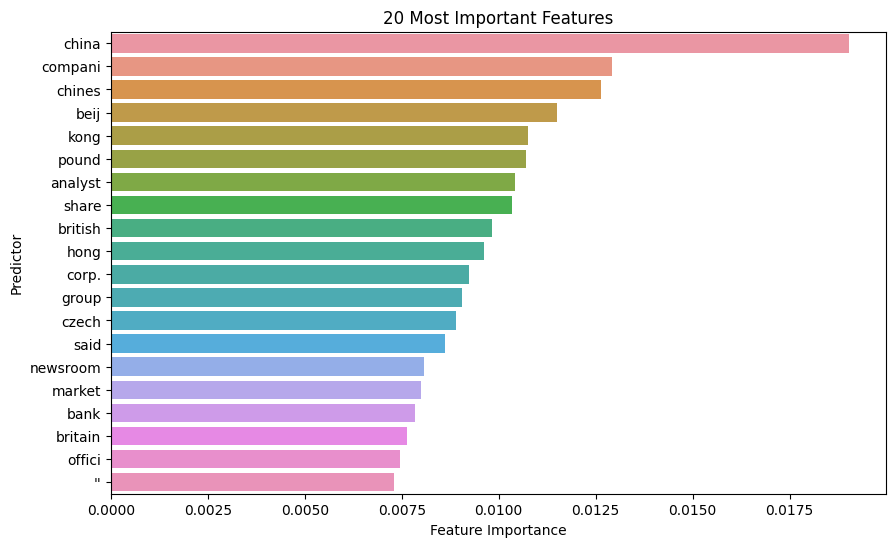

In [38]:
f_imp = model_rf.feature_importances_

# Create a DataFrame to store feature names and their importances
f_imp_df = pd.DataFrame({'Feature': train_set.columns, 'Importance': f_imp})

# Sort the DataFrame by importance in descending order
f_imp_df = f_imp_df.sort_values(by='Importance', ascending=False)

# Specify the number of top features to visualize
n = 20  # Change this value to set the number of top features

# Select the top n features
top_vars = f_imp_df.head(n)

# Create a bar plot of top n features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_vars)
plt.xlabel('Feature Importance')
plt.ylabel('Predictor')
plt.title(f'{n} Most Important Features')
plt.show()


Top 5 tokens for feature importance are:
    China
    compani
    chines
    beij
    kong
    
Seems like Reuters Authors are quite interested in East Asian corporate affairs !!

Other important tokens are bank , offici , market , corp , group , newsroom suggesting that the articles emphasize a lot on commercial and business activities